# UTS

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
path = 'KlasifikasiUTS.csv'
df = pd.read_csv(path)

In [35]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [36]:
df = df.drop('Time', axis=1)

#### Kita drop Time karena mungkin tidak relevan

#### Kita cek apakah dalam dataset ada nilai yang kosong

In [37]:
null_counts = df.isnull().sum()

features_with_nulls = null_counts[null_counts > 0]

if len(features_with_nulls) > 0:
    print("Features with null values:")
    print(features_with_nulls)
else:
    print("No features have null values.")


No features have null values.


#### Tidak ada nilai yang kosong, lanjut

#### Kita cek kelas apa saja yang ada dan berapa jumlah kelas tersebut

In [38]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Feature Selection

#### Kita cek apakah perlu seleksi multicollinearity pada matrix korelasi.

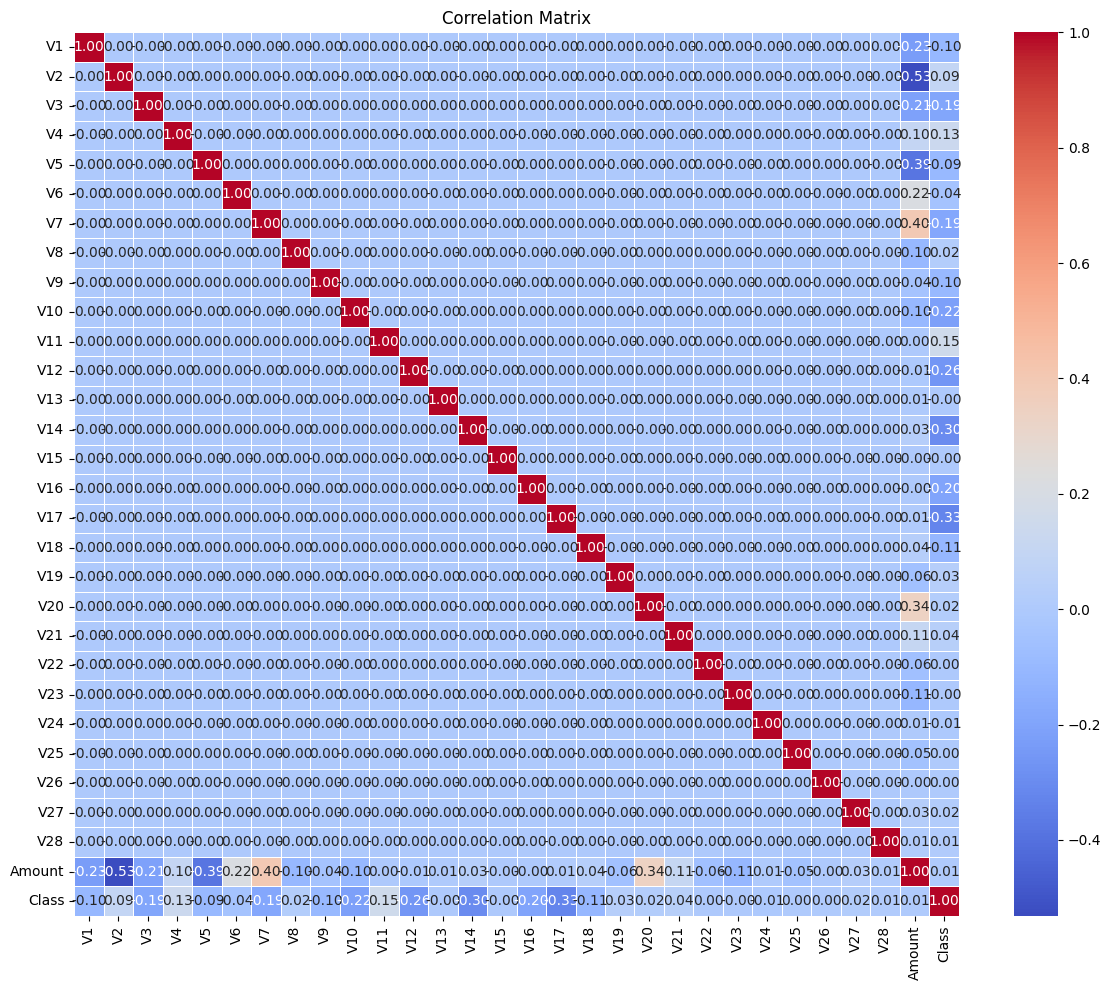

In [39]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


#### Tidak ada fitur yang colinear (sesama korelasi tinggi), maka kita lanjut ke feature selection selanjutnya.

#### Kita akan lakukan training model terlebih dahulu, agar ada perbandingan performa sebelum dan setelah preprocessing.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Kita gunakan StandardScaling pada X untuk menskalakan.

Akan digunakan XGB dan Logistic Classifier untuk pengujian ini.

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42, max_iter=2000)
logistic.fit(X_train, y_train)

logistic_pred = logistic.predict(X_test)


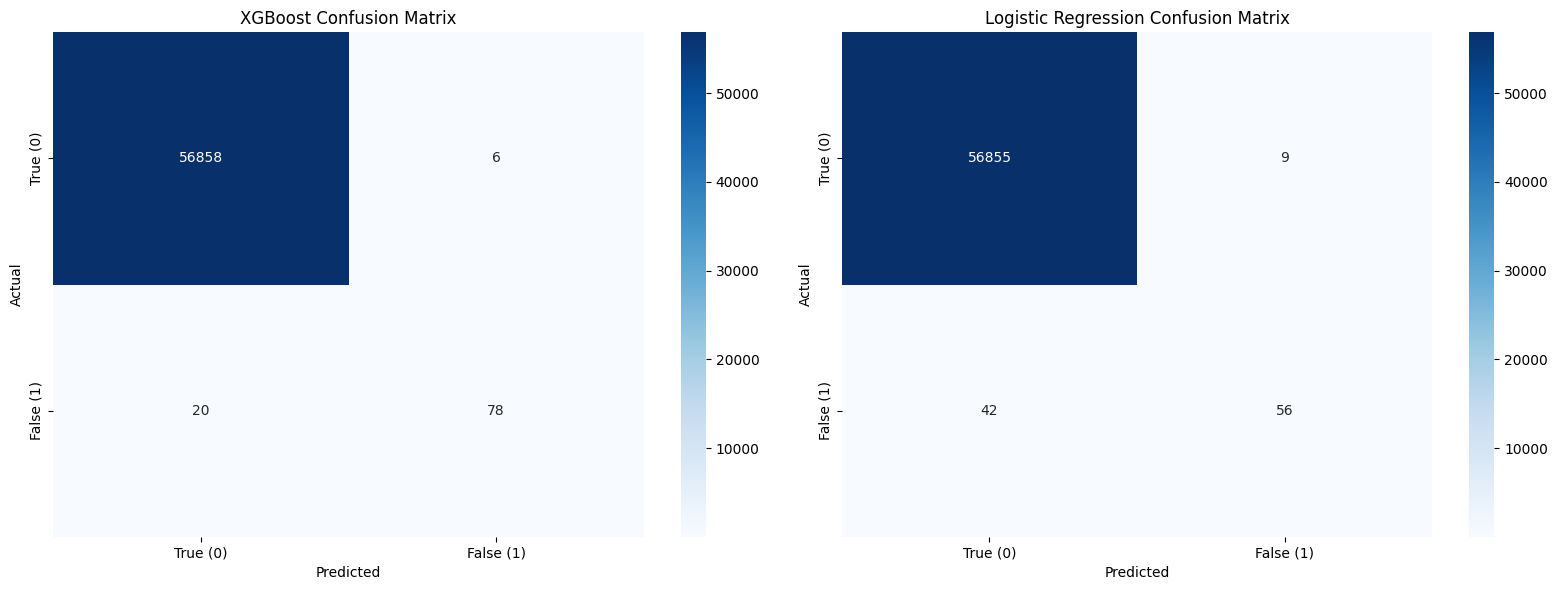

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



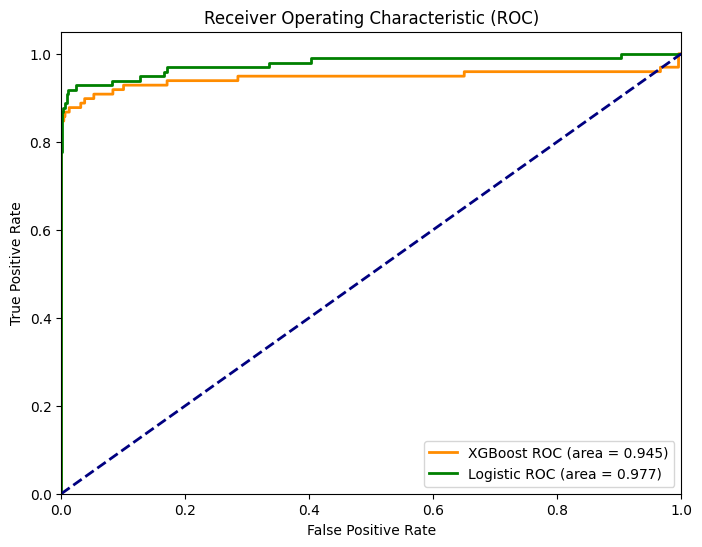

XGBoost ROC AUC Score: 0.9450
Logistic Regression ROC AUC Score: 0.9769


In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['True (0)', 'False (1)'], 
            yticklabels=['True (0)', 'False (1)'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('XGBoost Confusion Matrix')

cm_logistic = confusion_matrix(y_test, logistic_pred)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['True (0)', 'False (1)'], 
            yticklabels=['True (0)', 'False (1)'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

plt.figure(figsize=(8, 6))

y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, 
         label=f'XGBoost ROC (area = {roc_auc_xgb:.3f})')

y_pred_proba_logistic = logistic.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
plt.plot(fpr_logistic, tpr_logistic, color='green', lw=2, 
         label=f'Logistic ROC (area = {roc_auc_logistic:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"XGBoost ROC AUC Score: {roc_auc_xgb:.4f}")
print(f"Logistic Regression ROC AUC Score: {roc_auc_logistic:.4f}")


#### Hasil lumayan bagus, ROC-AUC dan Precision lumayan tinggi. Recall pada Logistic Regression pada kelas 1 rendah (0.56), namun ROC nya lebih tinggi.

## Oversampling

#### Kita akan coba lakukan oversampling dan lihat hasilnya apakah lebih akurat

In [44]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

X_train = X_train_smote
y_train = y_train_smote


Class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [46]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

In [47]:
logistic = LogisticRegression(random_state=42, max_iter=2000)
logistic.fit(X_train, y_train)

logistic_pred = logistic.predict(X_test)

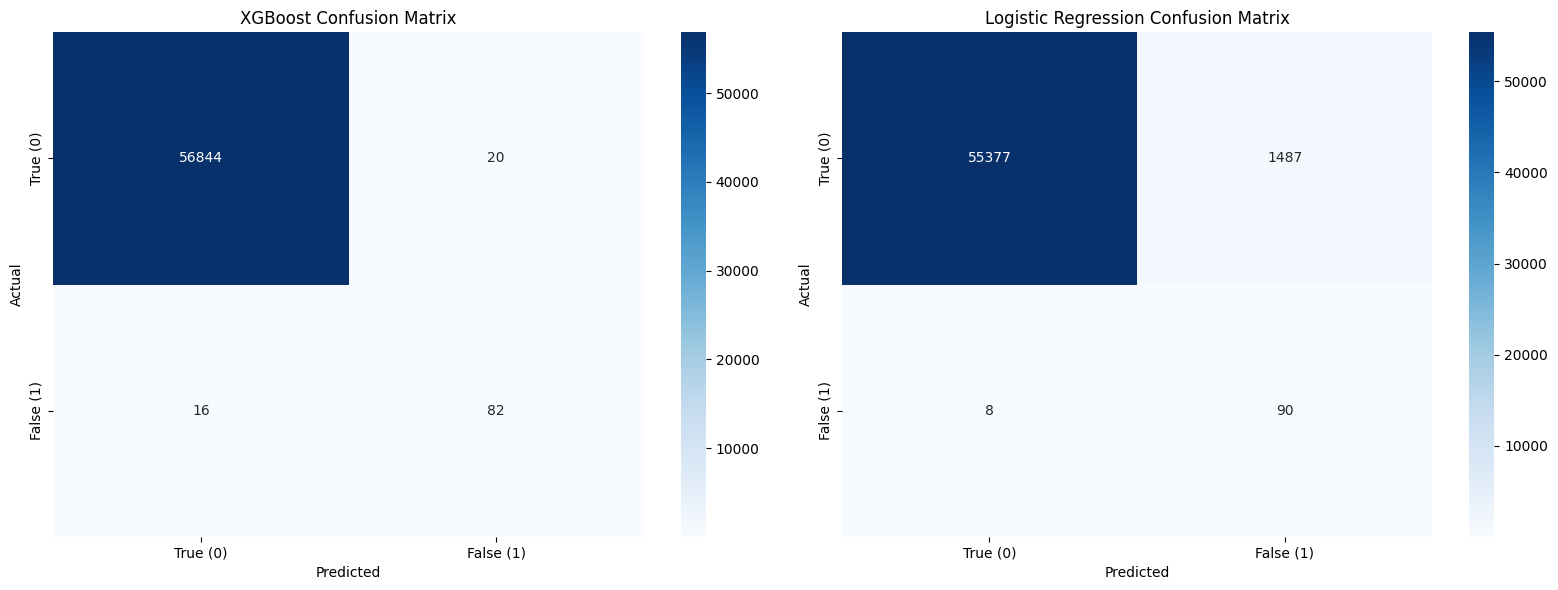

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



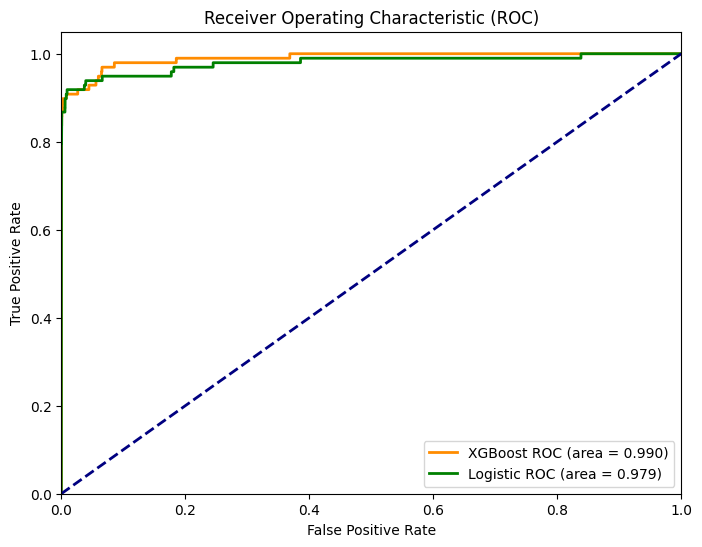

XGBoost ROC AUC Score: 0.9901
Logistic Regression ROC AUC Score: 0.9794


In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['True (0)', 'False (1)'], 
            yticklabels=['True (0)', 'False (1)'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('XGBoost Confusion Matrix')

cm_logistic = confusion_matrix(y_test, logistic_pred)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['True (0)', 'False (1)'], 
            yticklabels=['True (0)', 'False (1)'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

plt.figure(figsize=(8, 6))

y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, 
         label=f'XGBoost ROC (area = {roc_auc_xgb:.3f})')

y_pred_proba_logistic = logistic.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
plt.plot(fpr_logistic, tpr_logistic, color='green', lw=2, 
         label=f'Logistic ROC (area = {roc_auc_logistic:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"XGBoost ROC AUC Score: {roc_auc_xgb:.4f}")
print(f"Logistic Regression ROC AUC Score: {roc_auc_logistic:.4f}")

### Recall meningkat drastis untuk Linear Regression setelah menggunakan SMOTE. Nilai Precision (kelas 1) sangat turun untuk Linear Regression Namun ROC-AUC score meningkat.

### Kita akan coba model lain.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42))

print("Training Decision Tree classifier...")
dt.fit(X_train, y_train)

print("Training KNN classifier...")
knn.fit(X_train, y_train)

print("Training Bagging classifier...")
bagging.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
bagging_pred = bagging.predict(X_test)


Training Decision Tree classifier...
Training KNN classifier...
Training Bagging classifier...


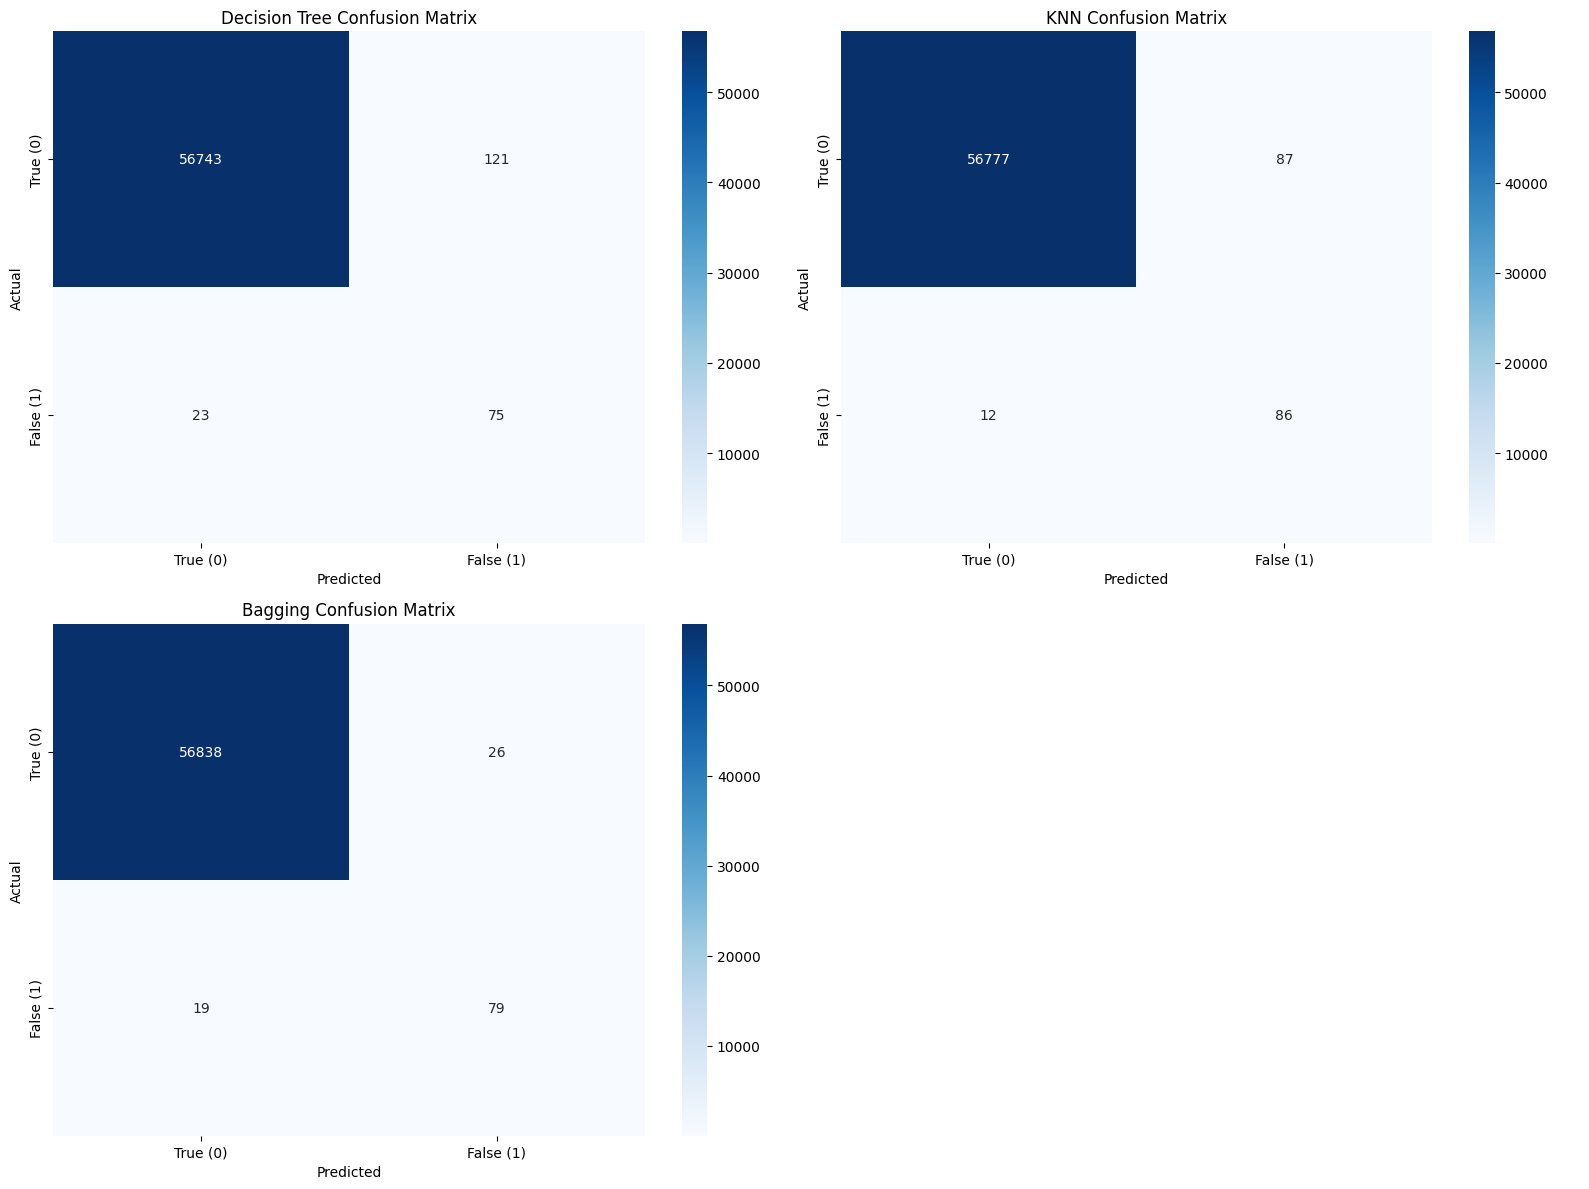

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.77      0.51        98

    accuracy                           1.00     56962
   macro avg       0.69      0.88      0.75     56962
weighted avg       1.00      1.00      1.00     56962


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.88      0.63        98

    accuracy                           1.00     56962
   macro avg       0.75      0.94      0.82     56962
weighted avg       1.00      1.00      1.00     56962


Bagging Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.81      0.78        98

    accuracy                           1.00     56962
   macro avg       0.88      0.

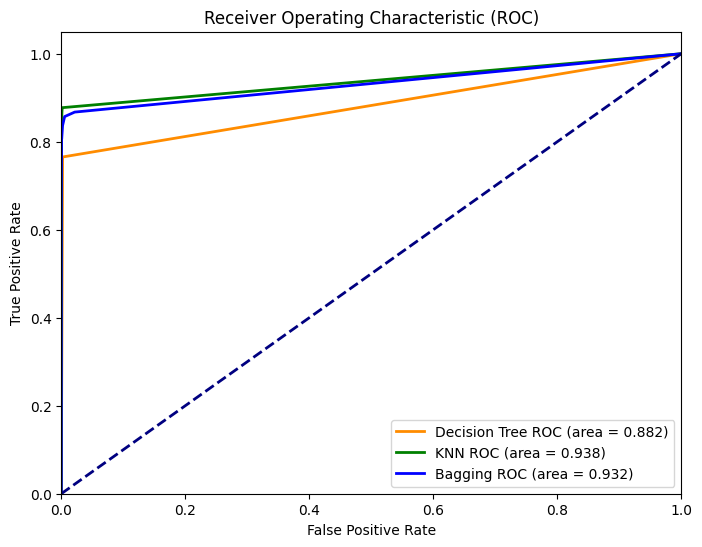

Decision Tree ROC AUC Score: 0.8816
KNN ROC AUC Score: 0.9383
Bagging ROC AUC Score: 0.9319


In [50]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['True (0)', 'False (1)'], 
            yticklabels=['True (0)', 'False (1)'], ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_title('Decision Tree Confusion Matrix')

cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['True (0)', 'False (1)'], 
            yticklabels=['True (0)', 'False (1)'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_title('KNN Confusion Matrix')

cm_bagging = confusion_matrix(y_test, bagging_pred)
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['True (0)', 'False (1)'], 
            yticklabels=['True (0)', 'False (1)'], ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')
axes[1, 0].set_title('Bagging Confusion Matrix')

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred))
print("\nBagging Classification Report:")
print(classification_report(y_test, bagging_pred))

plt.figure(figsize=(8, 6))

y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, 
         label=f'Decision Tree ROC (area = {roc_auc_dt:.3f})')

y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, 
         label=f'KNN ROC (area = {roc_auc_knn:.3f})')

y_pred_proba_bagging = bagging.predict_proba(X_test)[:, 1]
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_pred_proba_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)
plt.plot(fpr_bagging, tpr_bagging, color='blue', lw=2, 
         label=f'Bagging ROC (area = {roc_auc_bagging:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"Decision Tree ROC AUC Score: {roc_auc_dt:.4f}")
print(f"KNN ROC AUC Score: {roc_auc_knn:.4f}")
print(f"Bagging ROC AUC Score: {roc_auc_bagging:.4f}")


# Kesimpulan dan Analisis

## Ringkasan Performa Model
- **XGBoost**: Performa terbaik secara keseluruhan dengan ROC AUC 0.9901
- **Logistic Regression**: ROC AUC baik (0.9794) tetapi precision rendah
- **KNN**: Performa moderat dengan ROC AUC 0.9383
- **Bagging**: Performa solid dengan ROC AUC 0.9319
- **Decision Tree**: Performa terendah dengan ROC AUC 0.8816

## Penjelasan Metrics

### Precision
Precision mengukur akurasi dari prediksi positif:
$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

### Recall
Recall mengukur kemampuan untuk menemukan semua instance positif:
$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

### F1-Score
F1-Score adalah rata-rata harmonik dari precision dan recall:
$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

### ROC AUC
Area Under the Receiver Operating Characteristic curve mengukur kemampuan model untuk membedakan antar kelas:
$$\text{ROC AUC} = \int_{0}^{1} \text{TPR}(t) \times \text{FPR}'(t) dt$$

## Mengapa Recall Lebih Penting dalam Deteksi Fraud

Dalam deteksi fraud, recall jauh lebih penting daripada precision karena:

1. **Biaya False Negative**: Melewatkan transaksi fraud (false negative) biasanya jauh lebih mahal daripada menandai transaksi sah sebagai mencurigakan (false positive).
2. **Ketidakseimbangan Kelas**: Seperti ditunjukkan dalam dataset kita, kelas 1 sangat jarang, sehingga penting untuk menangkap sebanyak mungkin kasus.

Melihat model kita, Logistic Regression mencapai recall tertinggi untuk fraud (0.92) tetapi dengan precision sangat rendah (0.06), menunjukkan banyak false positive. XGBoost menawarkan keseimbangan terbaik dengan recall 0.84 dan precision 0.80 untuk kasus fraud.

## Penjelasan Model

### XGBoost (Performa Terbaik)
XGBoost (Extreme Gradient Boosting) adalah metode ensemble yang menggunakan gradient boosted decision trees. Model ini membangun trees secara berurutan dimana setiap tree baru memperbaiki kesalahan yang dibuat oleh tree sebelumnya:

$$\hat{y}_i = \sum_{k=1}^{K} f_k(x_i), \quad f_k \in \mathcal{F}$$

Dimana $f_k$ merepresentasikan prediksi dari tree ke-$k$ dan $\mathcal{F}$ adalah ruang semua kemungkinan trees. XGBoost mengoptimalkan:

$$\mathcal{L}(\phi) = \sum_{i=1}^n l(y_i, \hat{y}_i) + \sum_{k=1}^K \Omega(f_k)$$

Dimana $l$ adalah fungsi loss dan $\Omega$ adalah term regularisasi.

### Logistic Regression
Logistic Regression memodelkan probabilitas fraud menggunakan:

$$P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p)}}$$

Model ini menunjukkan recall tinggi tetapi precision rendah, menunjukkan terlalu agresif dalam menandai transaksi sebagai fraud.

### Decision Tree, KNN, dan Bagging
Model-model ini menunjukkan tingkat performa yang bervariasi:
- **Decision Trees** membagi data berdasarkan threshold fitur untuk memaksimalkan information gain
- **KNN** mengklasifikasikan berdasarkan majority class dari k-nearest neighbors
- **Bagging** (Bootstrap Aggregating) membuat beberapa model dari subsampel acak dan merata-ratakan prediksi

Untuk tugas deteksi fraud ini, XGBoost memberikan keseimbangan optimal antara menangkap transaksi fraud (recall) sambil meminimalkan false alarm (precision).